Load libraries and both cleaned data from the previous data cleaning and the coefficient in the respective features from Model 3  
Which is a model that has the best performance, with the highest amount of features.  
  
This is to ensure the analysis are sufficiently comprehensive

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

data = pd.read_csv('./data/cleaned_data.csv')
features = pd.read_csv('./data/features.csv')

In [2]:
features.sort_values('coefficient').head()

,Unnamed: 0,features,coefficient
3,3,hdb_age,-44436.838707
36,36,planning_area_Woodlands,-26040.926002
5,5,mrt_nearest_distance,-24801.708760
14,14,planning_area_Choa Chu Kang,-19290.060419
29,29,planning_area_Sembawang,-18343.515057


In [3]:
features.sort_values('coefficient').tail()

,Unnamed: 0,features,coefficient
42,42,flat_type_EXECUTIVE,18415.028705
2,2,mid,19235.510146
1,1,max_floor_lvl,24566.363912
6,6,Hawker_Within_2km,32201.666952
0,0,floor_area_sqm,85291.511923


From the above, we can identify the following:  
Top 5 most *positive* impact features are: floor area, number of hawkers within 2km, highest floor of the development, the level of the unit, and with all else equal, an executive flat type tends to be more expensive than the other flat type  

Top 5 most *negative* impact features are: HDB age, the distance from the nearest MRT station, and with all else equal, flat located in the areas like Woodlands, Choa Chu Kang and Sembwang tend to have the most negative impact on the resale price.

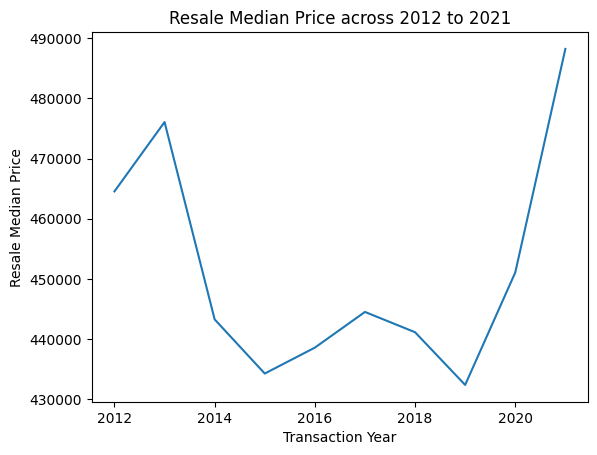

In [4]:
sns.lineplot(data.groupby('Tranc_Year')['resale_price'].mean())
plt.xlabel('Transaction Year')
plt.ylabel('Resale Median Price')
plt.title('Resale Median Price across 2012 to 2021')
plt.show()

The data shows that there was a decline in property prices between 2013 to 2015. Most likely it was due to 'Propery Market Cooling Measures', such as the Additional Buyer's Stamp Duty (ABSD), Loan-to-Value (LTV) Ratio, and Total Debt Servicing Ratio (TDSR).  
Details can be found in the below link.  
https://www.businesstimes.com.sg/property/mobile-spotlight/summary-singapores-property-cooling-measures-1996-present-day

We are then to identify, how does each planning area align with the above overall trend in property prices

#### Analysis by area

In [5]:
years = np.sort(data['Tranc_Year'].unique())
areas = data['planning_area'].unique()

median_year = []

for year in years:
    for area in areas:
        median = data[(data['Tranc_Year'] == year) & (data['planning_area'] == area)]['resale_price'].median()
        median_year.append({'year': year, 
                            'Area': area, 
                            'Median': median})

median_year = pd.DataFrame(median_year)

C:\Users\heziy\AppData\Local\Temp\ipykernel_9032\2106523265.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(7, 5, n+1)


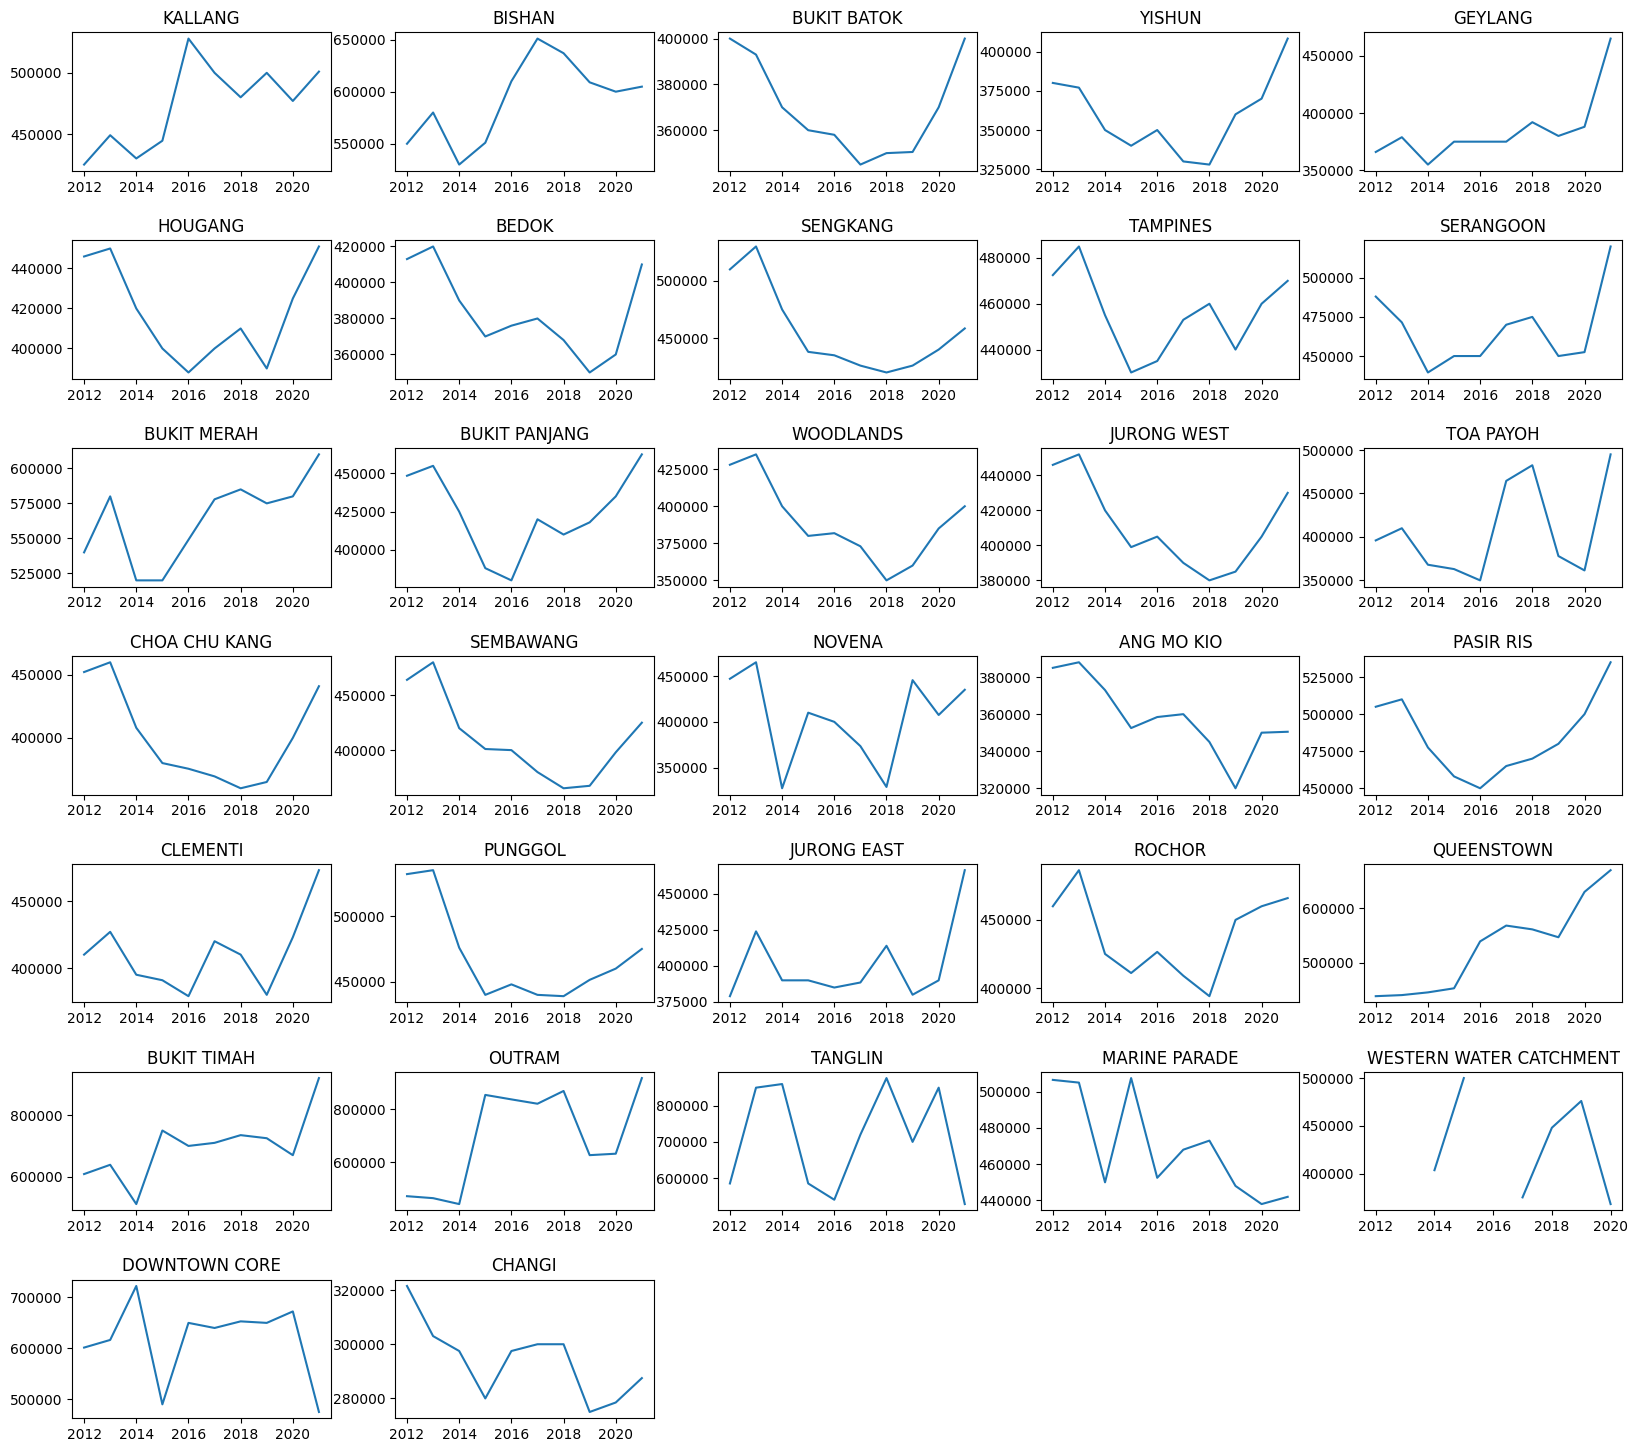

In [6]:
plt.figure(figsize=(20,18))
plt.subplots_adjust(hspace=0.5, wspace=0.25)
plt.title('median price in different areas', fontsize=15, y=0.95)

for n, area in enumerate(areas):
    ax = plt.subplot(7, 5, n+1)
    filter = median_year[median_year['Area'] == area].sort_values('year')
    filter.plot(x='year', y='Median', ax=ax, legend=False)
    ax.set_title(area.upper())
    ax.set_xlabel("")

# ax.lineplot(median_year[(median_year['Area'] == 'Bishan')], x='year', y='Median')

From the above, we can conclude the following:  
* Not all area encounters the same effect from the cooling measures, areas such as Bukit Timah, Outram, Queenstown, Kallang and Geylang were not affected
* For areas like Changi and Marine Parade, the cooling measures pushed the price down and it still has not seen any significant recovery in price
* Different areas demonstrate different rate of recovery. Areas such as SengKang, Punggol and Ang Mo Kio experiences slower recovery in HDB retail price comparing to areas such as Yishun, Hougang, Bukit Batok and Bedok.


#### Analysis by growth (2012 to 2021)

In [7]:
median_yoychg = []

for area in areas:
    new = median_year[median_year['Area'] == area]
    new = new.sort_values('year')
    new = new.reset_index(drop=True)
    new['chg'] = new['Median'].pct_change()
    ave = new['chg'].mean()
    median_yoychg.append({'Area': area,
                          'Avg_growth_%': ave*100})

median_yoychg = pd.DataFrame(median_yoychg)

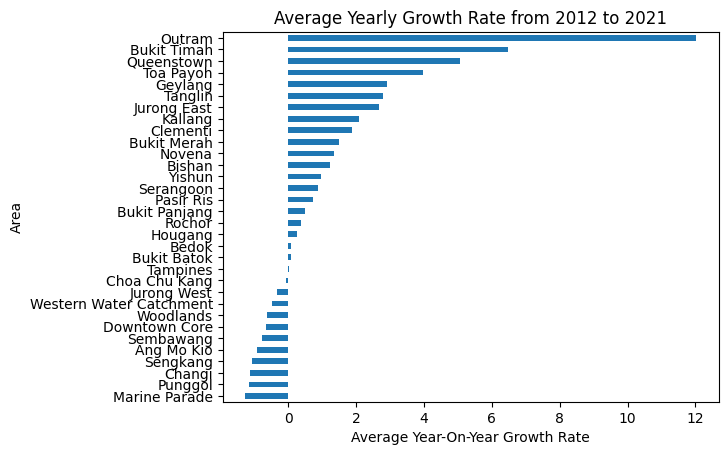

In [8]:
median_yoychg.sort_values('Avg_growth_%', inplace=True)
median_yoychg.plot.barh(x='Area', y='Avg_growth_%', title='Average Yearly Growth Rate from 2012 to 2021', legend=False)
plt.xlabel('Average Year-On-Year Growth Rate')
plt.show()

Above is the average yearly growth rate of each area. It can demonstrate which planning area in Singapore tend to have faster growth than the others.  
This is despite the cooling measures imposed from 2013 to 2015, as the tenor span across 2012 to 2021.  

However, Outram looks to demonstrate too much of a growth, while areas like Ang Mo Kio, Bishan and Punggol look to be underperformed.  
Let us investigate further within individual area.

C:\Users\heziy\AppData\Local\Temp\ipykernel_9032\4076694107.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(7, 5, n+1)


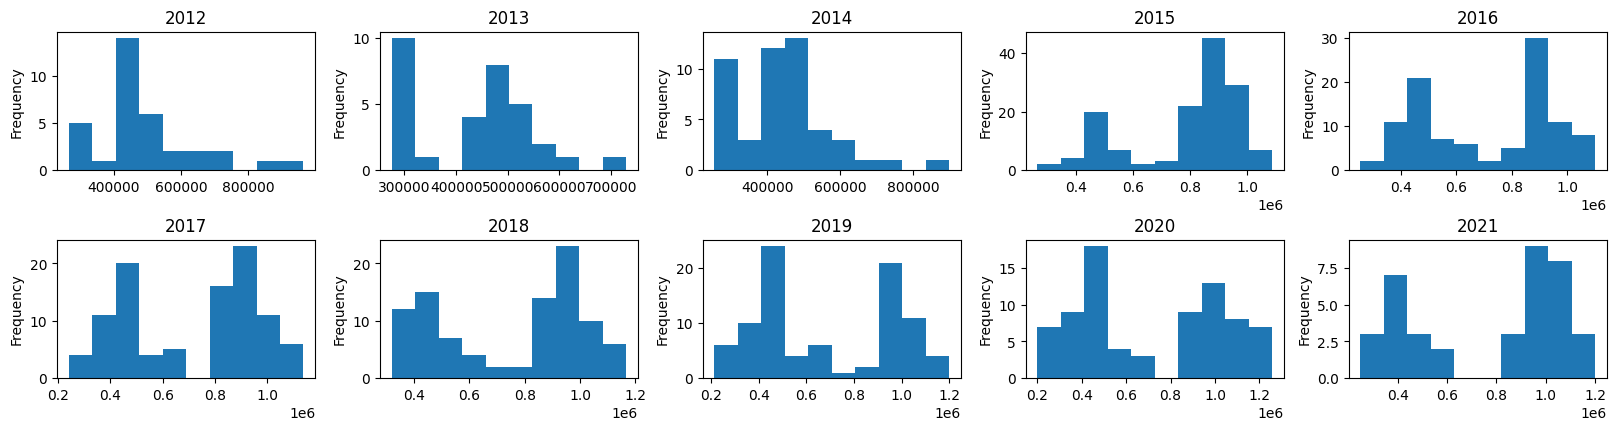

In [9]:
Outram = data[data['planning_area'] == 'Outram'] # isolate data from Outram

plt.figure(figsize=(20,18))
plt.subplots_adjust(hspace=0.5, wspace=0.25)
plt.title('price distribution across 2012 to 2021', fontsize=15, y=0.95)

for n, year in enumerate(years):
    ax = plt.subplot(7, 5, n+1)
    filter = Outram[Outram['Tranc_Year'] == year]
    filter.plot.hist(y='resale_price', ax=ax, legend=False)
    ax.set_title(year)
    ax.set_xlabel("")

It looks like the data in the area has been relativley distorted by the sales of Pinnacle @ Duxton, where units were sold hitting 1mio since 2015. Details can be found in the below StraitsTimes article.  
https://www.straitstimes.com/singapore/housing/pinnacleduxton-flat-goes-for-112-million  

Since the above happened in 2015 into 2016, we might like to shrink our analysis tenor to be from 2016 to 2021 for better analysis.  
Let us look at Ang Mo Kio and Punggol before changing the tenor

C:\Users\heziy\AppData\Local\Temp\ipykernel_9032\2629467700.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(7, 5, n+1)


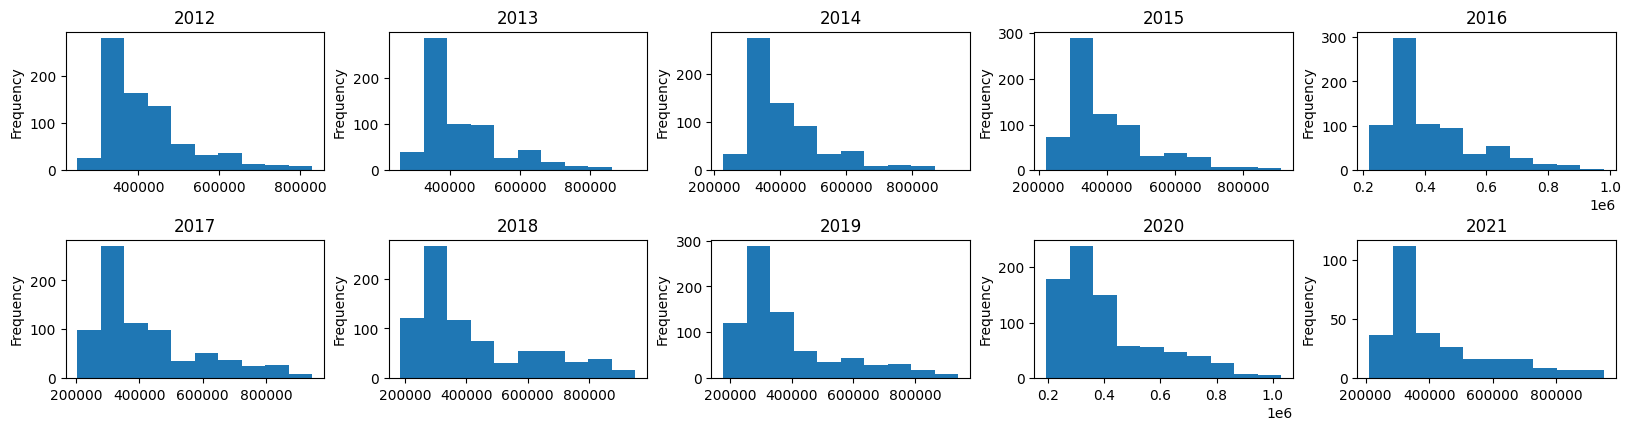

In [10]:
AMK = data[data['planning_area'] == 'Ang Mo Kio'] # isolate data from Ang Mo Kio (AMK)

plt.figure(figsize=(20,18))
plt.subplots_adjust(hspace=0.5, wspace=0.25)
plt.title('price distribution across 2012 to 2021', fontsize=15, y=0.95)

for n, year in enumerate(years):
    ax = plt.subplot(7, 5, n+1)
    filter = AMK[AMK['Tranc_Year'] == year]
    filter.plot.hist(y='resale_price', ax=ax, legend=False)
    ax.set_title(year)
    ax.set_xlabel("")

C:\Users\heziy\AppData\Local\Temp\ipykernel_9032\1403471148.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(7, 5, n+1)


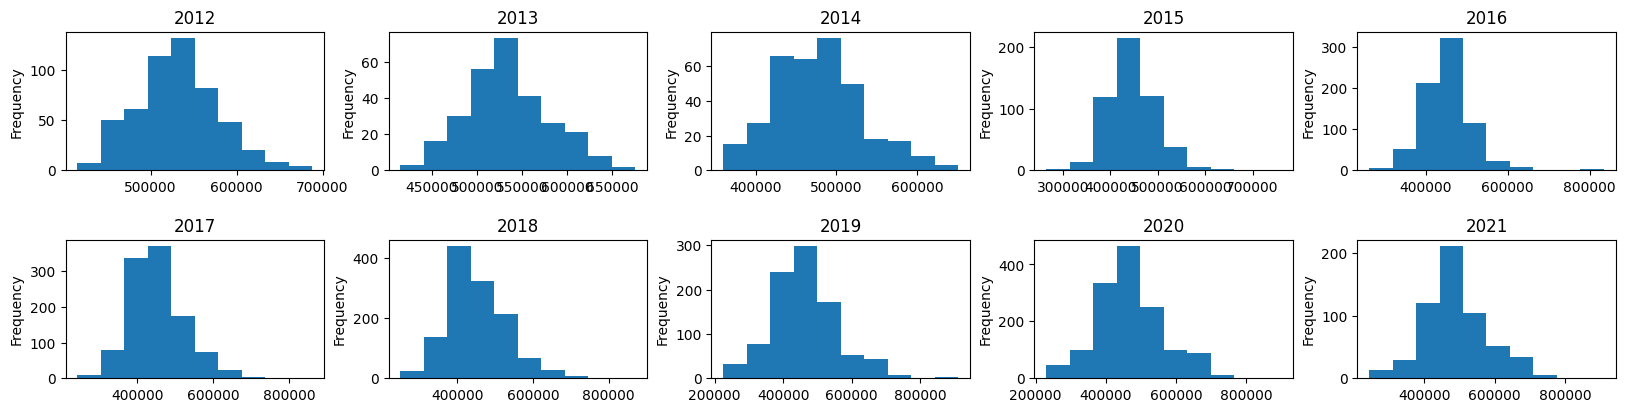

In [11]:
Punggol = data[data['planning_area'] == 'Punggol'] # isolate data from Punggol

plt.figure(figsize=(20,18))
plt.subplots_adjust(hspace=0.5, wspace=0.25)
plt.title('price distribution across 2012 to 2021', fontsize=15, y=0.95)

for n, year in enumerate(years):
    ax = plt.subplot(7, 5, n+1)
    filter = Punggol[Punggol['Tranc_Year'] == year]
    filter.plot.hist(y='resale_price', ax=ax, legend=False)
    ax.set_title(year)
    ax.set_xlabel("")

It looks like both Ang Mo Kio and Punggol display consistent distribution in resale prices through out the years.  
Ang Mo Kio looks to be more right skewed, probably due to a number of unit hit 1 million in recent years, but the consistent supply of BTO keeps the price in the area relatively stable.  

It comes as a surprise to me that Ang Mo Kio and Punggol display such low growth, probably because information that I gathered are mostly along the line of "The flat in Ang Mo Kio very expensive!", which does not necessarily mean it has decent growth rate. 

I will then shrink the analysis into 2017 to 2021 only

#### Analysis by growth (2017 to 2021)

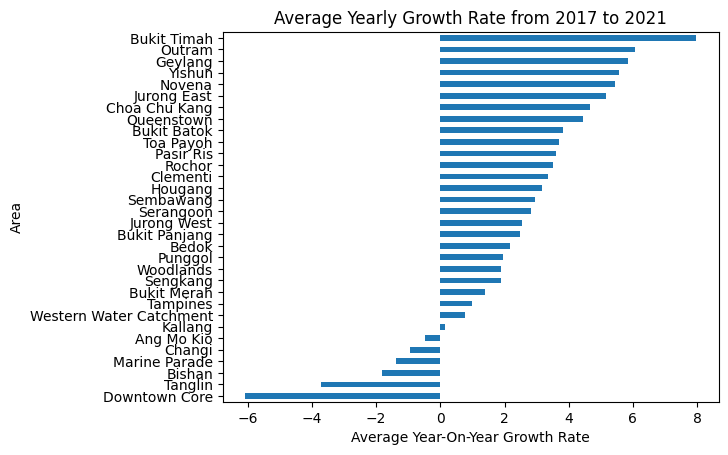

In [12]:
median_year_1721 = median_year[median_year['year'].isin([2017, 2018, 2019, 2020, 2021])]

median_yoychg_1721 = []

for area in areas:
    new = median_year_1721[median_year_1721['Area'] == area]
    new = new.sort_values('year')
    new = new.reset_index(drop=True)
    new['chg'] = new['Median'].pct_change()
    ave = new['chg'].mean()
    median_yoychg_1721.append({'Area': area,
                               'Avg_growth_%': ave*100})

median_yoychg_1721 = pd.DataFrame(median_yoychg_1721)

median_yoychg_1721.sort_values('Avg_growth_%', inplace=True)
median_yoychg_1721.plot.barh(x='Area', y='Avg_growth_%', title='Average Yearly Growth Rate from 2017 to 2021', legend=False)
plt.xlabel('Average Year-On-Year Growth Rate')
plt.show()

Despite isolating the analysis to the past 5 years, Bukit Timah, Outram and Geylang still remain in the top 5 fastest growth amongst the areas.  
Surprisingly, the growth rate in the areas Yishun and Novena have improved dramatically, from merely average about 2% from 2012 to average 6% from 2017.  
  
Area like Punggol and Choa Chu Kang have also improved from negative growth rate to positive growth rate.  

#### Additional Analysis on areas with significant improvement

We have identified from earlier that areas like Yishun, Novena, Punggol and Choa Chu Kang look to have decent improvement in terms of growth rate in the past 5 years. Let us try to identify what could be the cause of the improvements.

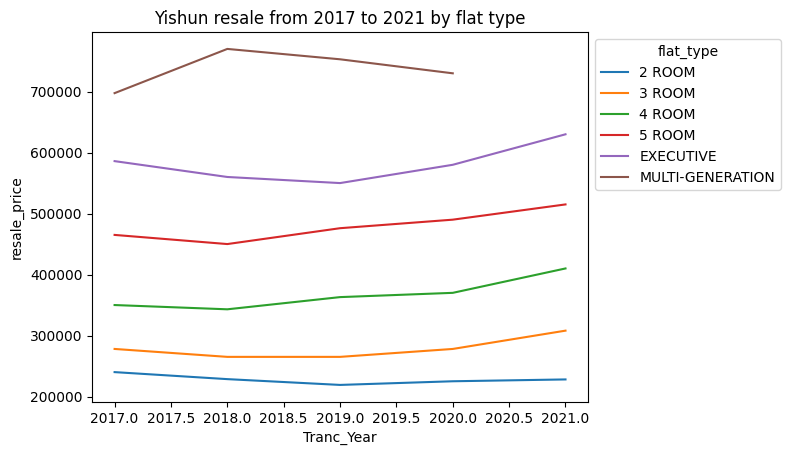

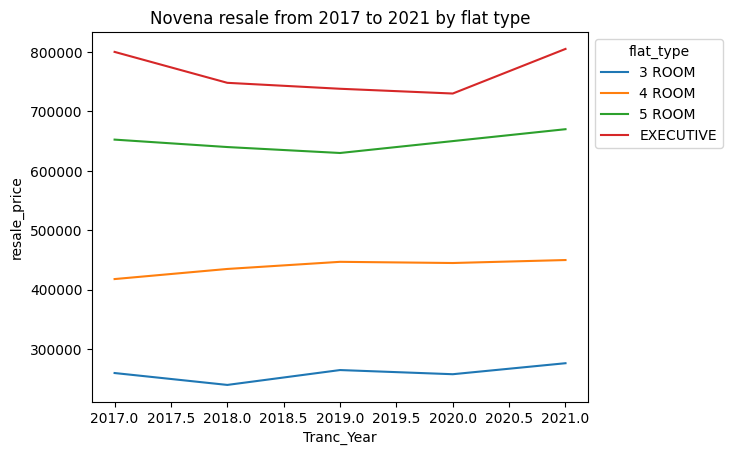

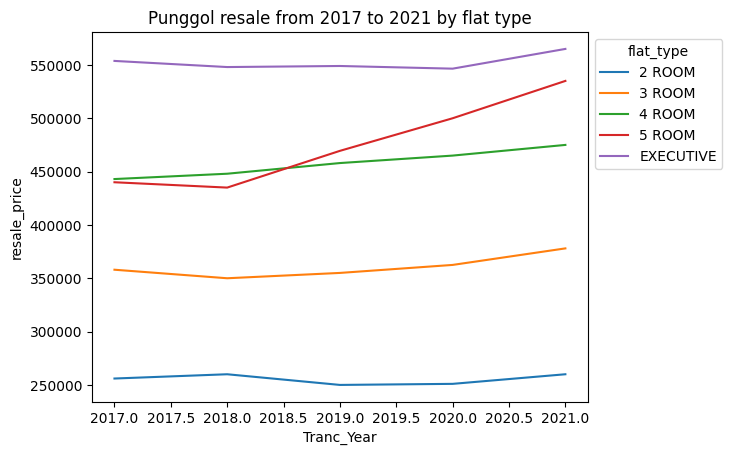

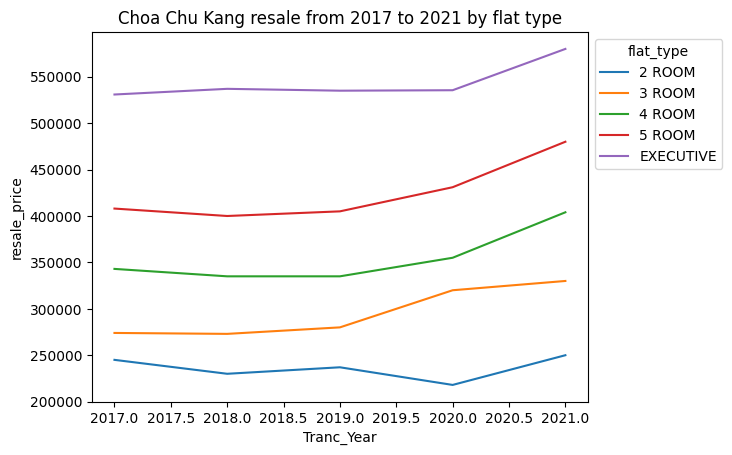

In [13]:
improved_areas = ['Yishun', 'Novena', 'Punggol', 'Choa Chu Kang']
data_1721 = data[data['Tranc_Year'].isin([2017, 2018, 2019, 2020, 2021])]

for area in improved_areas:
    group = data_1721[data_1721['planning_area'] == area]
    filter = group.groupby(['Tranc_Year','flat_type'])['resale_price'].median().reset_index()
    ax = sns.lineplot(filter, x='Tranc_Year', y='resale_price', hue='flat_type')
    ax.set_title(f'{area} resale from 2017 to 2021 by flat type')
    sns.move_legend(ax, 'upper left', bbox_to_anchor=(1,1))
    plt.show()

The growth in resale price in the past 5 years look to have been consistently led by flat type of 4 Room, 5 Room and Executive.  
Next we look at the distribution in prices


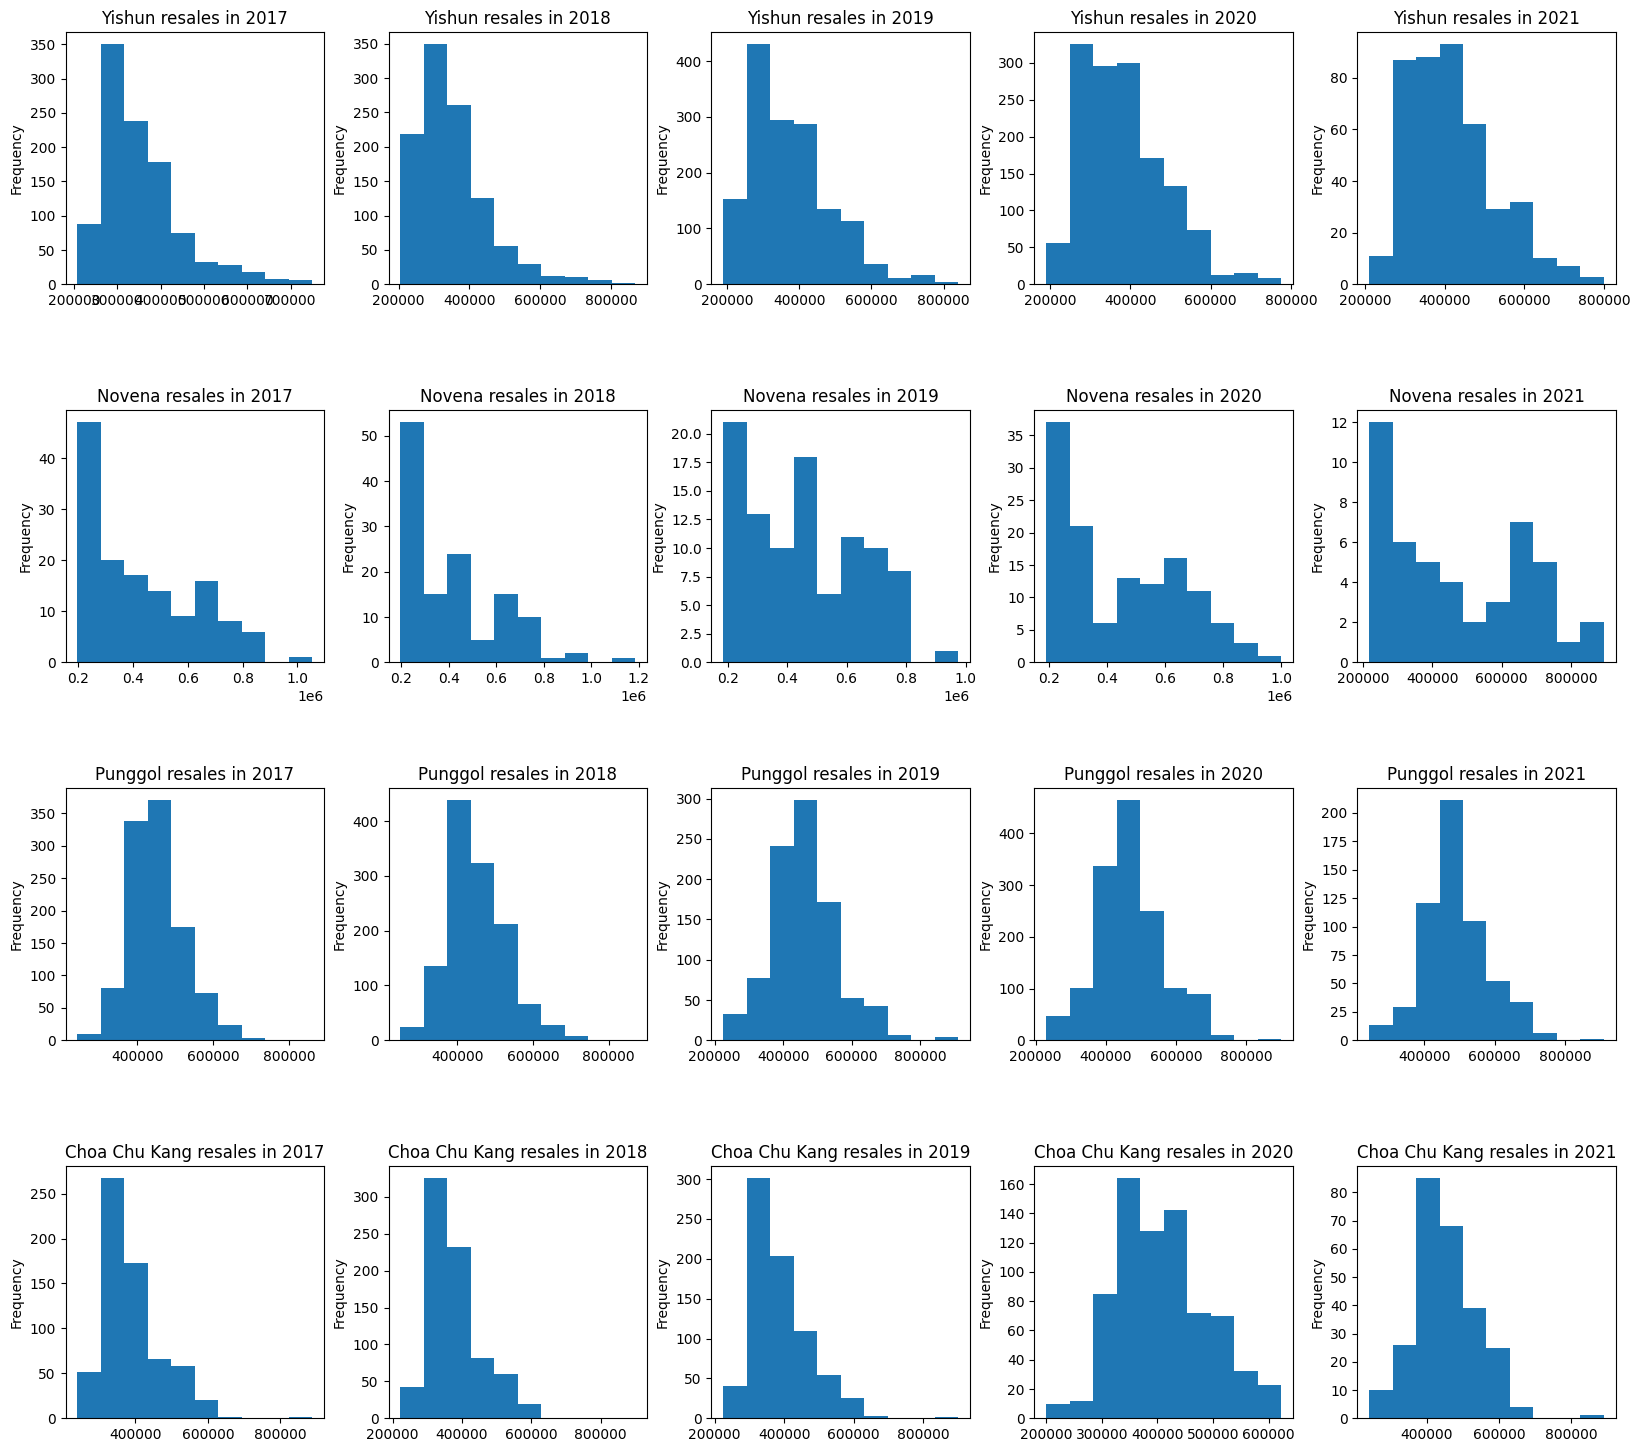

In [14]:
plt.figure(figsize=(20,18))
plt.subplots_adjust(hspace=0.5, wspace=0.25)

for m, area in enumerate(improved_areas):
    for n, year in enumerate([2017, 2018, 2019, 2020, 2021]):
        ax = plt.subplot(4, 5, (n+1)+m*5) # this allows different area to be plotted across 
        group = data_1721[data_1721['planning_area'] == area]
        filter = group[group['Tranc_Year'] == year]
        filter.plot.hist(y='resale_price', ax=ax, legend=False)
        ax.set_title(f'{area} resales in {year}')
        ax.set_xlabel("")

There looks to be a steady "shift" in the distribution towards the right, indicating resale price is growing steadily.   
It is worth noting that the demand in both Yishun and Punggol areas are signiciant higher than Novena and Choa Chu Kang, indicated by the relatively higher frequency read across the past 5 years.    

Next we look at the max storey of the developments

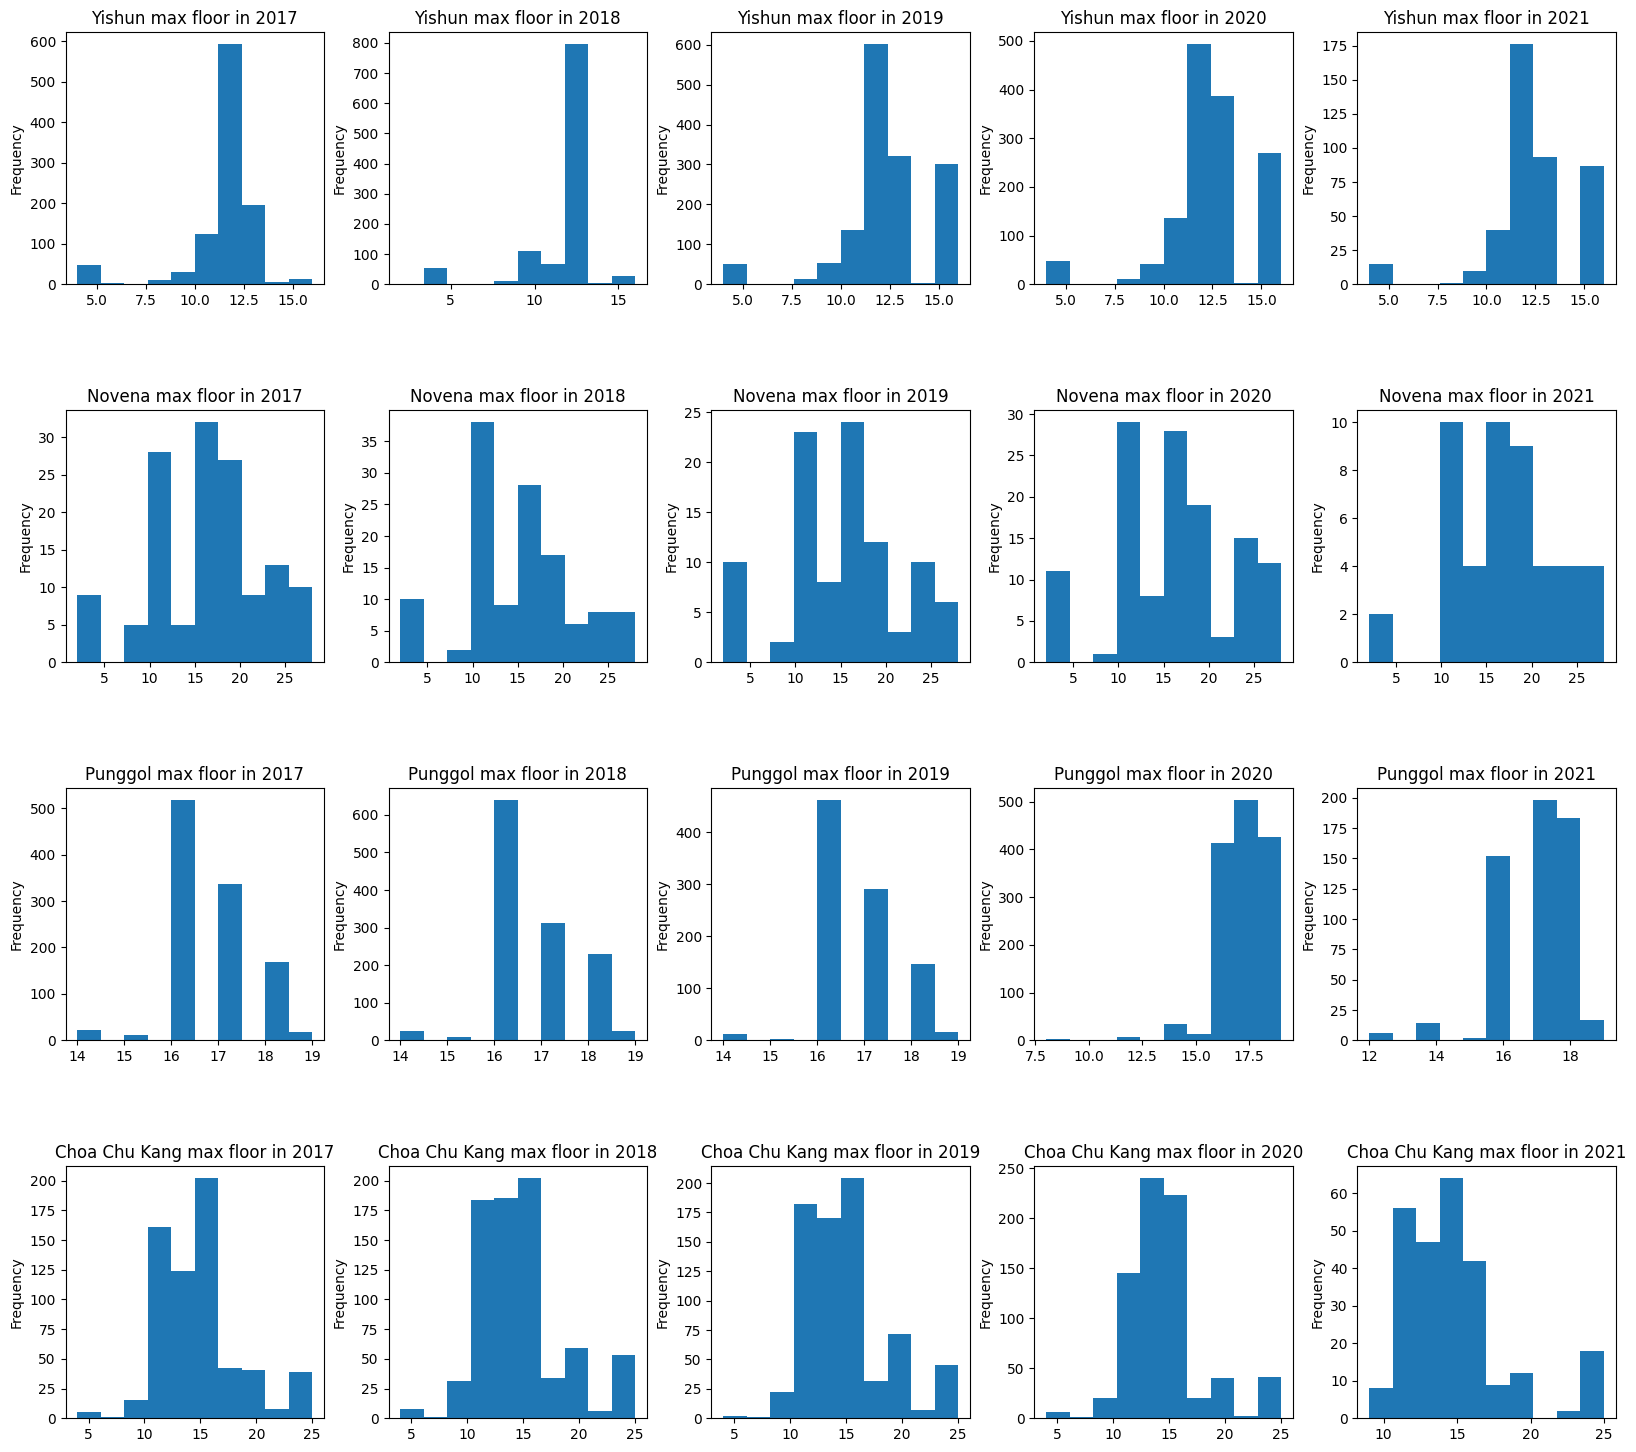

In [15]:
plt.figure(figsize=(20,18))
plt.subplots_adjust(hspace=0.5, wspace=0.25)

for m, area in enumerate(improved_areas):
    for n, year in enumerate([2017, 2018, 2019, 2020, 2021]):
        ax = plt.subplot(4, 5, (n+1)+m*5) # this allows 
        group = data_1721[data_1721['planning_area'] == area]
        filter = group[group['Tranc_Year'] == year]
        filter.plot.hist(y='max_floor_lvl', ax=ax, legend=False)
        ax.set_title(f'{area} max floor in {year}')
        ax.set_xlabel("")

More units from a higher development have been purchased in the past 5 years, indicating the attractiveness of such building in the specified regions.  
It could also indicate that more higher leveled development became available during the past 5 years. 

Finally, we look at the age of units

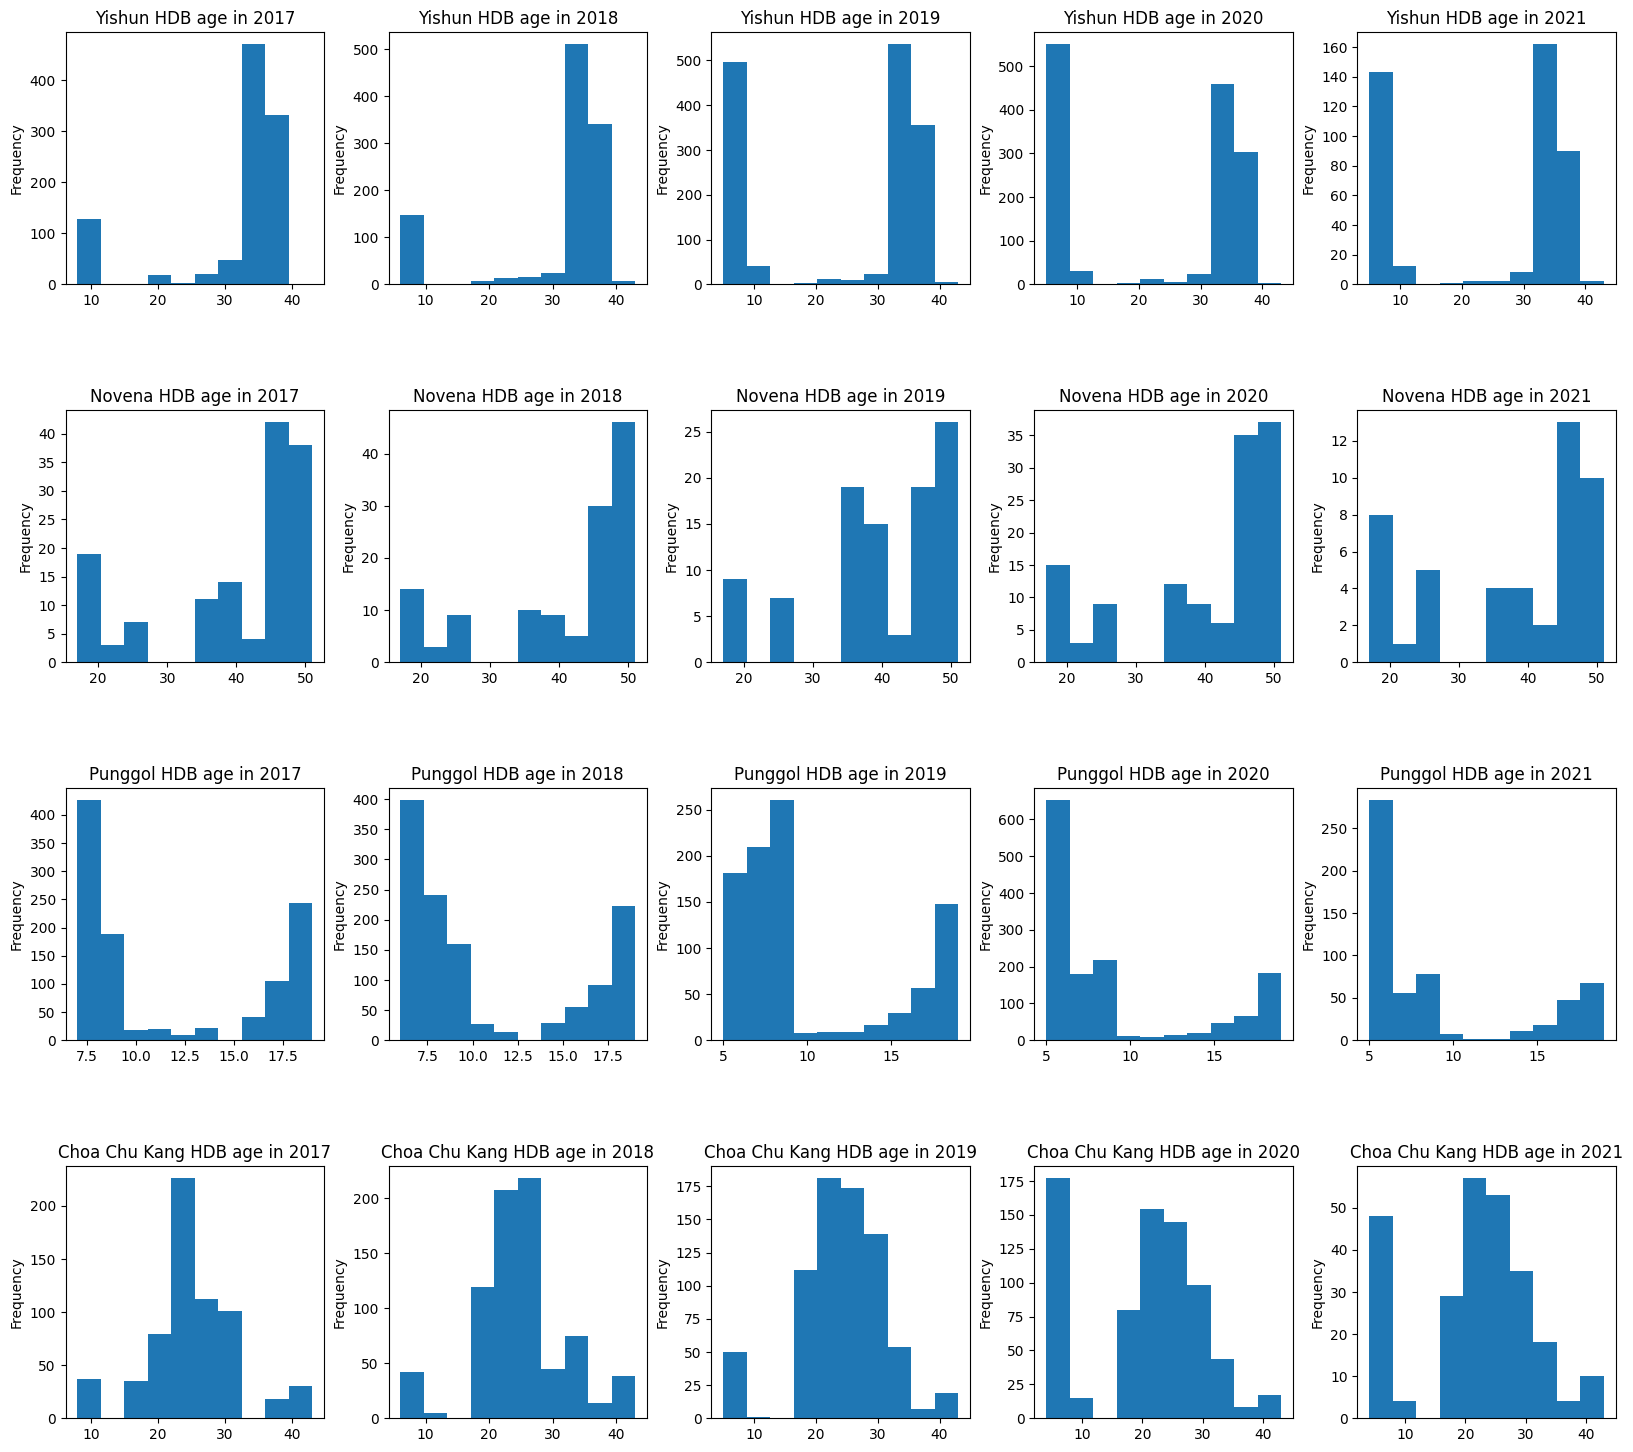

In [16]:
plt.figure(figsize=(20,18))
plt.subplots_adjust(hspace=0.5, wspace=0.25)

for m, area in enumerate(improved_areas):
    for n, year in enumerate([2017, 2018, 2019, 2020, 2021]):
        ax = plt.subplot(4, 5, (n+1)+m*5) 
        group = data_1721[data_1721['planning_area'] == area]
        filter = group[group['Tranc_Year'] == year]
        filter.plot.hist(y='hdb_age', ax=ax, legend=False)
        ax.set_title(f'{area} HDB age in {year}')
        ax.set_xlabel("")

Most of the flats in both Novena and Choa Chu Kang look to be around or above 20 years, while Yishun and Punggol look to be much "younger".  
A younger flat allows it to have more time to grow in values compared to the relatively older flat. 

#### Conclusion

After all the analysis above, for home buyers who like to know which area offers the fastest growth in investment values, I will suggest *Yishun* and *Punggol* to be the best choice.  I will also suggest purchasing flat that is of 4 Room and bigger, to maximise the potential growth of the investment.  

This is not only built upon these areas have one of the best growth rate in the past 5 years, but also on the growing availability of higher development and younger HDB flat, which both contribute to its value growth potential. 
